In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
ARBITRARY_M = 1.3213423
ARBITRARY_B = 1.872113

MIN_VALUE = 0.0
MAX_VALUE = 100000.0
NUM_POINTS = 10000000

In [3]:
X_data = np.linspace(MIN_VALUE, MAX_VALUE, NUM_POINTS)
noise_value = np.random.randn(len(X_data)) * MAX_VALUE/5
y_true = (ARBITRARY_M * X_data) + ARBITRARY_B + noise_value

In [4]:
data = {'X_data': X_data, 'y_true': y_true}

df = pd.DataFrame(data=data)
df.head()

,X_data,y_true
0,0.00,-5914.987432
1,0.01,9878.847264
2,0.02,10908.415258
3,0.03,-32083.660929
4,0.04,-22905.658935


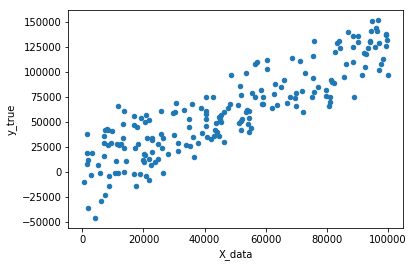

In [5]:
df.sample(n=200).plot(kind='scatter', x='X_data', y='y_true')

In [6]:
df.describe()

,X_data,y_true
count,1.000000e+07,1.000000e+07
mean,5.000000e+04,6.607070e+04
std,2.886752e+04,4.306912e+04
min,0.000000e+00,-8.986695e+04
25%,2.500000e+04,3.260494e+04
50%,5.000000e+04,6.607049e+04
75%,7.500000e+04,9.953542e+04
max,1.000000e+05,2.384797e+05


In [7]:
import tensorflow as tf

In [8]:
BATCH_SIZE = 256

In [9]:
m = tf.Variable(0.001)
b = tf.Variable(0.001)

In [10]:
X_train = tf.placeholder(tf.float32, [BATCH_SIZE])
y_validation = tf.placeholder(tf.float32, [BATCH_SIZE])

In [11]:
y_predict = m * X_train + b

In [12]:
loss = tf.reduce_sum(tf.square(y_validation-y_predict))

In [13]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0005)
train = optimizer.minimize(loss)

In [14]:
init = tf.global_variables_initializer()

In [15]:
with tf.Session() as session:
    session.run(init)
    BATCHES = 20000
    
    for batch in range(BATCHES):
        i = np.random.randint(len(X_data), size=BATCH_SIZE)
        feed_dict = {X_train:X_data[i], y_validation:y_true[i]}
        
        session.run(train, feed_dict=feed_dict)
        
    m_model, b_model = session.run([m,b])

In [16]:
[m_model, b_model]

[1.3212374, 1.3363316]

In [17]:
y_test = X_data * m_model + b_model

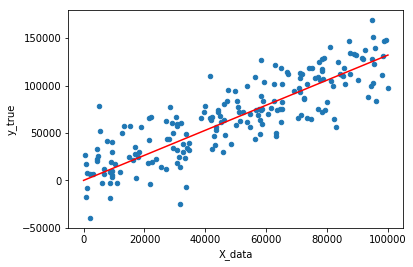

In [18]:
df.sample(n=200).plot(kind='scatter',x='X_data',y='y_true')
plt.plot(X_data, y_test, 'r')